In [2]:
# import torch
import csv

In [39]:

words = []

raw_words = open('Indian_names_kaggle.txt', 'r').read().splitlines()
words = [x.lower() for x in raw_words]
# print(words)


In [40]:
len(words)

55689

In [41]:
min(len(n) for n  in words)

2

In [42]:
max(len(n) for n  in words)

24

In [43]:
import torch




In [44]:
# Size 28 as we have 26 letters and 2 special chars S and E
N = torch.zeros(27, 27, dtype=torch.int32)

In [50]:
# Get all unique chars from words
chars = sorted(list(set(''.join(words))))
stoi = {s: i for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [51]:
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [52]:
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [53]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1 , ix2] += 1

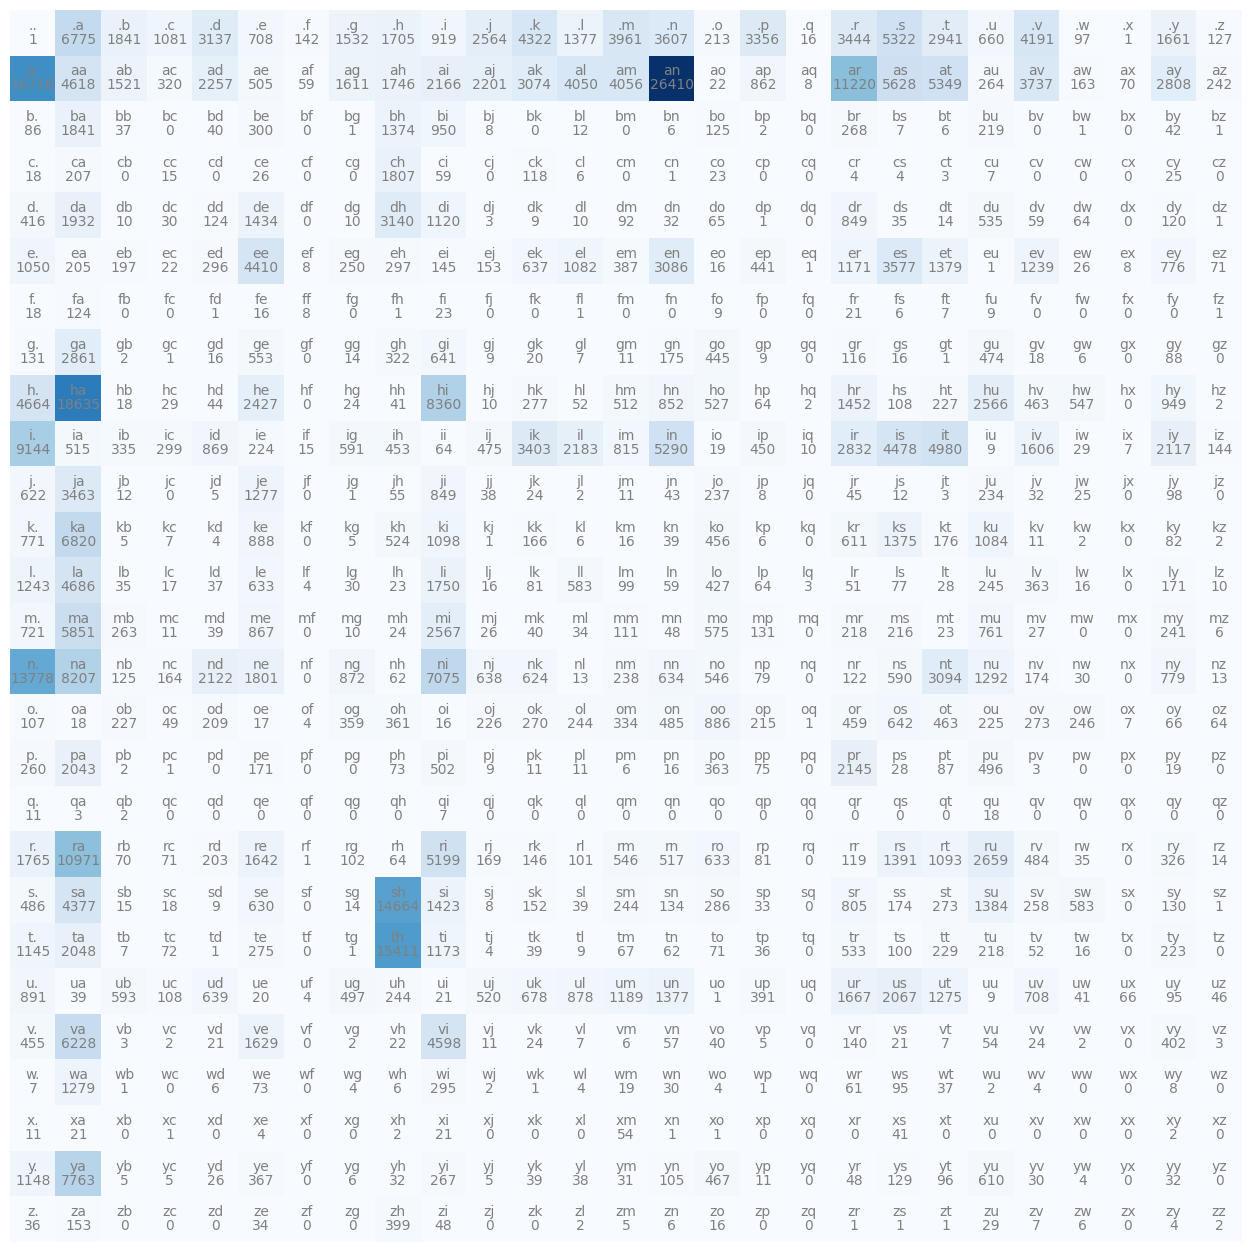

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [55]:
N[0, :]

tensor([   1, 6775, 1841, 1081, 3137,  708,  142, 1532, 1705,  919, 2564, 4322,
        1377, 3961, 3607,  213, 3356,   16, 3444, 5322, 2941,  660, 4191,   97,
           1, 1661,  127], dtype=torch.int32)

In [56]:
# Now we need to create probablity distribution
p = N[0]
p = p / p.sum()
p.sum()

tensor(1.0000)

In [17]:
# Now we will use torch.multinomial

In [57]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()

In [58]:
# Here we have created three random numbers and taken out probablities for it
p

tensor([0.6064, 0.3033, 0.0903])

In [59]:
# Now we will pass this to torch.multinomial to get samples out of it
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [60]:
# Above result shows that samples matches probablity. 60 % items are 0, 30% items are 1 and rest are 2s
# Now lets try this with our first row of probablities
# We will caclulate P again and take out just one sample
p = N[0]
p = p / p.sum()

g = torch.Generator().manual_seed(2147483647)
# Lets pass it to our itos dict to get letter
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'd'

In [62]:
# Lets try same in loop

g = torch.Generator().manual_seed(2147483647)
ix = 0

for i in range(100):
    out = []
    while True:
        p = N[ix]
        p = p / p.sum()

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

deeba.
pogakurari.
jitaharvinimithain.
lanak.
kan.
a.
sa.
ripubatharugothi.
mi.
jeelavuja.
preda.
ka.
dava.
sadeyankaviyayanthsh.
hinivenviralasu.
dshra.
an.
gangyan.
isan.
jaridhinkajam.
desu.
mirit.
gaikajahaabhaath.
kuvithevanariruthah.
keenan.
vi.
kalma.
avameer.
masoshabithananeevarisariyenth.
illevebhmidan.
pahaamahaamanemin.
tsharshaalasahr.
jaroopave.
shaaneen.
chak.
pranivi.
yananisasha.
ganil.
biyacarohara.
j.
anusthagishri.
ba.
radhmkara.
shikandaana.
jaja.
j.
gh.
hrukasarilralma.
m.
ri.
prahaye.
vn.
rithoshin.
mempandha.
tirikivanda.
myaareran.
mathituthasoovni.
rakarmeen.
ra.
miran.
prenithinamneeeen.
yukaa.
seavajeka.
ranari.
sukitta.
shyan.
mitiswatharumn.
jindelan.
kadirishulan.
denosi.
karumavanthaathmavarshatanan.
n.
j.
pakan.
zhraagata.
cakaji.
manva.
lains.
ukhaan.
ranketha.
dadega.
aa.
rushmanolela.
liyanarirapashava.
rmanoodish.
ponuvarmaruthideshahamili.
puvardhelananishanon.
iyariyethan.
zha.
aus.
ckadan.
lasakhyarovi.
kshatra.
dri.
anshaanna.
ahava.
k.
vikan.
a

In [ ]:
# Lets try same in loop

g = torch.Generator().manual_seed(2147483647)
ix = 0

for i in range(100):
    out = []
    while True:
        p = N[ix]
        p = p / p.sum()

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexzm.
zoglkurkicqzktyhwmvmzimjttainrlkfukzkktda.
sfcxvpubjtbhrmgotzx.
iczixqctvujkwptedogkkjemkmmsidguenkbvgynywftbspmhwcivgbvtahlvsu.
dsdxxblnwglhpyiw.
igwnjwrpfdwipkwzkm.
desu.
firmt.
gbiksjbquabsvoth.
kuysxqevhcmrbxmcwyhrrjenvxmvpfkmwmghfvjzxobomysox.
gbptjapxweegpfwhccfyzfvksiiqmvwbhmiwqmdgzqsamjhgamcxwmmk.
iswcxfmbalcslhy.
fpycvasvz.
bqzazeunschck.
wnkojuoxyvtvfiwksddugnkul.
fuwfcgjz.
abl.
j.
nuuutstofgqzubbo.
rdubpknhmd.
vhfacdvaaasjzjkdh.
gh.
frdhlhahflrklmlcugro.
pnxhayx.
vn.
gixgosfqn.
mempfnclfxtirbqhvjfdwhzymayerzqvmzjvtjuifbooocnkcxjkvsmjafciekxoraw.
.
veigtbcaamnef.
chfeukwowgsadjjkkswrcpawhoxskfikwbscynndmiuxxwoturzhqnsjdndsziocnbxiegzzulhnqdqwosi.
kdwnfjvmtthtpzbmdvvrvtptaqlhdnkj.
zxkcbczsrcagitwicvkcqiotgnvpllciqs.
uohjxnvxqikebadkdawdfwwha.
fqcnmrpoljlpjldyjehpprjppsmkzdhrmgyoadmsod.
dnvzcobtzfikidecxjhbmmjxqphvtedjbwkxzhisndnoauiycrdfetifkvzlzf.
ud.
ckndsgyldqbkcylrozgwkjgftrahdrnfapspdayna.
thavpgelvlfqxxsdabgxpyzv.
ikzvrykvyxhuj.
qkpwzuaics.
xxqubplmqguhbpnetz.
.
t